# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename) # YOUR CODE HERE

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1) I have chosen the airbnb listings data set.

2) I will be predicting the price of an airbnb based on provided features. My label is the price column.

3) This is a supervised learning problem, as I will be providing the label (the price) in the training data. This is a regression problem, as I am predicting a continous outcome (a number).

4) My features pre-data exploration are all of the features present in the data set other than the price column.

5) This is an important problem because a company may want to know what the price of an airbnb is based on many features (such as ratings, reviews, size, etc.) in order to create competitive pricings for similar properties in order to gain customers. Alternatively, a company could help airbnb owners price their properties appropriately (based on the same features present in the data set) for a small fee. 


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
import scipy.stats as stats

In [4]:
#use the describe() method to visualize statistics
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [5]:
#inspect column names and datatypes
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [6]:
#inspect columns that have object values
object_columns = df.select_dtypes(include = 'object')
for column in object_columns:
    print(column, df[column].nunique())

name 27386
description 25952
neighborhood_overview 15800
host_name 7566
host_location 1364
host_about 11962
neighbourhood_group_cleansed 5
room_type 4
amenities 25020


In [7]:
#inspect the neighbourhood_group_cleansed and room_type values
print(df.shape)
print('neighourhood_group_cleansed:', df['neighbourhood_group_cleansed'].unique())
print('room_type:', df['room_type'].unique())

(28022, 50)
neighourhood_group_cleansed: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
room_type: ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [ ]:
#drop all object columns except neighbourhood_group_cleansed and room_type because the others have far too many values to one-hot encode
to_drop = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'amenities']
df_new = df.drop(labels = to_drop, axis = 1)
print('original shape:', df_new.shape)

## Analysis of Data Inspection

Through performing the above inspections, I have deduced that I will perform one-hot encoding on the neighbourhood_group_cleansed and room_type features. Also, I created a new data frame, called df_new, that lacks the features I removed. I will now use only this data frame.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

## My Project Plan

<Double click this Markdown cell to make it editable, and record your answers here.>

Yes, I do have a new feature list. I am keeping all of the features except these: ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'amenities']. These are features with the object data type that have too many unique values to perform one-hot encoding. Additionally, I do not think that a feature like 'host_name' would have predictive value in this problem.

To prepare my data, I will first perform one-hot encoding on the object columns. Then, I will use the winsorization technique to eliminate outliers from my data. Then, I will use the fillna() method to replace any missing values with their mean. Next, I will transform the boolean features to have values of 1s or 0s using the replace() method. Then, I will analyze the correlation of each feature with the label and remove  features that have a less than 2% correlation with the label. 

The models I am going to experiment with are linear regression, decision trees, and possibly random forest, gradient boosted decision trees, and neural networks.

I plan on using grid-search to test linear regression and decision trees initially, testing various hyperparameters for them. I will create graphs of the hyperparameters vs. accuracy of my model to analyze how changes in the hyperparameters affect the model's performance. If I determine that I should be testing more hyperparameter values, I will do so. 
I will then determine the model that so far has the best accuracy, and I will then perform feature selection to determine which number of features yields the optimal performance. If I decide that my model is still not performing as well as I want it to, I might try random forest, gradient boosted decision trees, or neural networks to see if they demonstrate better performance.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [56]:
# YOUR CODE HERE
#will need to import linear model things, such as accuracy metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor

#import decision trees
from sklearn.tree import DecisionTreeRegressor

#import grid-search and cross-validation tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

#import graphing tools
import matplotlib.pyplot as plt
import seaborn as sns

#import random forest-maybe
from sklearn.ensemble import RandomForestRegressor

#import gradient boosted decision trees-maybe
#import neural networks-maybe

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Data Preparation

In [8]:
# YOUR CODE HERE

#perform one-hot encoding on the neighbourhood_group_cleansed and the room_type columns
to_encode = ['neighbourhood_group_cleansed', 'room_type']

for column in to_encode:
    #create the new encoded data frame
    df_encoded = pd.get_dummies(df_new[column], prefix = column + '_')
    #join the encoded data frame with the original data frame
    df_new = df_new.join(df_encoded)
    #drop the original column from the data frame
    df_new = df_new.drop(labels = column, axis = 1)
    
#display new shape, should be 50 columns
print('new shape:', df_new.shape)

#display the new column names to ensure that the one-hot encoding worked
df_new.columns

original shape: (28022, 43)
new shape: (28022, 50)


Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_r

In [9]:
#remove outliers by using the winsorize method
#DISCLAIMER- I know I could do this by just reassigning the winsorized column back to the old column, but I want to practice
#dropping and renaming columns as well

old_columns = list(df_new.columns)
for column in old_columns:
    df_new[column +'-w'] = stats.mstats.winsorize(df_new[column], limits = [0.01, 0.01])
#check that change has occurred due to the winsorization
print(df_new['price-w'] - df_new['price'])

#drop the non-winsorized columns
df_new = df_new.drop(labels = old_columns, axis = 1)

#rename the columns with -w with their original column names
new_columns = list(df_new.columns)
name_mapping = {}
for column in new_columns:
    name_mapping[column] = column[:-2]
df_new = df_new.rename(columns = name_mapping)
df_new.head()

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
28017      0.0
28018   -101.0
28019      0.0
28020      0.0
28021      0.0
Length: 28022, dtype: float64


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,n_host_verifications,neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,0.80,0.17,True,8.0,8.0,True,True,1,1.0,NaN,...,9,0,0,1,0,0,1,0,0,0
1,0.09,0.69,True,1.0,1.0,True,True,3,1.0,1.0,...,6,0,1,0,0,0,1,0,0,0
2,1.00,0.25,True,1.0,1.0,True,True,4,1.5,2.0,...,3,0,1,0,0,0,1,0,0,0
3,1.00,1.00,True,1.0,1.0,True,True,2,1.0,1.0,...,4,0,0,1,0,0,0,0,1,0
4,NaN,NaN,True,1.0,1.0,True,True,1,1.0,1.0,...,7,0,0,1,0,0,0,0,1,0


In [10]:
#inspect columns with missing values
nan_count = np.sum(df_new.isnull(), axis = 0)
nan_count

host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm      

In [13]:
#obtain the correlation matrix, take the absolute value, and display them in descending order
exclude = ['price']
corrs = df_new.corr()['price'].drop(exclude, axis = 0)
corrs_abs = abs(corrs)
corrs_sorted = corrs_abs.sort_values(ascending = False)
corrs_sorted

accommodates                                    0.516222
bedrooms                                        0.462181
beds                                            0.405765
room_type__Private room                         0.364792
room_type__Entire home/apt                      0.356821
bathrooms                                       0.310736
neighbourhood_group_cleansed__Manhattan         0.241940
availability_60                                 0.152464
minimum_minimum_nights                          0.151606
availability_90                                 0.148327
availability_30                                 0.145384
minimum_nights                                  0.143138
neighbourhood_group_cleansed__Queens            0.135177
minimum_nights_avg_ntm                          0.125479
availability_365                                0.124195
maximum_minimum_nights                          0.118807
host_response_rate-na                           0.118400
neighbourhood_group_cleansed__B

In [14]:
#remove features that have a low correlation with the label or a null correlation
#for now, remove any features that have a less than 2% correlation with the price column
print('original shape:', df_new.shape)
to_remove = list(corrs_sorted[-11:].index)
df_1 = df_new.drop(labels = to_remove, axis = 1)
print('new shape-should be 43:', df_1.shape)
df_1.head()

original shape: (28022, 54)
new shape-should be 43: (28022, 43)


,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,...,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Private room,room_type__Shared room,beds-na,bedrooms-na,host_response_rate-na,host_acceptance_rate-na
0,0.170000,8.0,8.0,1.0,1.0,1.329708,1.0,150.0,30.0,30.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.690000,1.0,1.0,3.0,1.0,1.000000,3.0,75.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250000,1.0,1.0,4.0,1.5,2.000000,2.0,275.0,5.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1.0,1.0,2.0,1.0,1.000000,1.0,68.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.791953,1.0,1.0,1.0,1.0,1.000000,1.0,75.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [12]:
#convert boolean features to 1 for True and 0 for False
df_new.replace({True: 1.0, False: 0.0}, inplace = True)
df_new.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room,beds-na,bedrooms-na,host_response_rate-na,host_acceptance_rate-na
0,0.800000,0.170000,1.0,8.0,8.0,1.0,1.0,1.0,1.0,1.329708,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.090000,0.690000,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.250000,1.0,1.0,1.0,1.0,1.0,4.0,1.5,2.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.906901,0.791953,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [11]:
#determine if the columns can have missing values replaced with their means
df_new['beds']
df_new['bedrooms']
df_new['host_response_rate']
df_new['host_acceptance_rate']
missing_values = ['beds', 'bedrooms', 'host_response_rate', 'host_acceptance_rate']

#keep track of which rows had NA values
for column in missing_values:
    df_new[column + '-na'] = df_new[column].isnull()

#now replace the missing values with their means
for column in missing_values:
    mean = df_new[column].mean()
    df_new[column].fillna(value = mean, inplace = True)

#check results, display nan count now
np.sum(df_new[missing_values].isnull())

beds                    0
bedrooms                0
host_response_rate      0
host_acceptance_rate    0
dtype: int64

In [16]:
# YOUR CODE HERE
# create the label and the feature columns 
y = df_1['price']
X = df_1.drop(columns = 'price', axis = 1)

## Linear Regression

In [17]:
#perform training/test data split using parameters appropriate for linear regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, random_state = 42, test_size = 0.15)

#create, fit, and train the linear model
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
predictions = model_lr.predict(X_test_lr)

In [18]:
#analyze performance of linear model
#mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test_lr, predictions)))
#coefficient of determination
print('R2 score:', r2_score(y_test_lr, predictions))
#determine the range of the price column
print('lowest price:' ,min(df_1['price']))
print('highest price:', max(df_1['price']))

RMSE: 95.65215762780721
R2 score: 0.4685701317355041
lowest price: 30.0
highest price: 899.0


In [21]:
#instead train a model using the SGD regressor to see how performance compares
model_sgdr = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant')
model_sgdr.fit(X_train_lr, y_train_lr)
predictions_sgdr = model_sgdr.predict(X_test_lr)
print('RMSE:', np.sqrt(mean_squared_error(y_test_lr, predictions_sgdr)))
#coefficient of determination
print('R2 score:', r2_score(y_test_lr, predictions_sgdr))


RMSE: 1.1106727401264788e+16
R2 score: -7.165205385661617e+27


After training a linear regression model using stochastic gradient descent and without, I have determined that the linear regression model trained without SGD has better performance. This is because the range of the price label is from 30 to 899, a difference of 869.
Therefore, the fact that my model differs on average by 95 units is okay, as that is about 10% of the total range of the column. However, the model trained using the SGD regressor has an enormous RMSE that is not even on the same magnitude as the price column. I am not entirely sure why this is, but I think that decision trees may produce better results, so I will now try training decision trees and will compare results. If I deem that SGD could be given another shot, I will alter the hyperparameters and try again.

## Decision Trees

In [22]:
#create training and test data splits for use on the decision trees
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [23]:
#create a hyperparameter grid to run grid search with

#create range of hyperparameter values from max_depth, using the values we used in previous assignments
depths = [2**n for n in range(2, 5)]

#create range of hyperparameter values for min_samples_leaf, using the values we used in previous assignments
leaves = [25*2**n for n in range(0,3)]
param_grid = {'max_depth': depths, 'min_samples_leaf': leaves}
param_grid


{'max_depth': [4, 8, 16], 'min_samples_leaf': [25, 50, 100]}

In [24]:
#perform the grid search, testing various combinations of hyperparameters 
print('Running grid search...')
model_dt = DecisionTreeRegressor()

#create a grid search object using 5 fold cross validation
grid = GridSearchCV(model_dt, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search = grid.fit(X_train_dt, y_train_dt)
print('Done')

Running grid search...
Done


In [25]:
#analyze which of the hyperparameters are the best to identify a range to further test
print('Optimal hyperparameters:', grid_search.best_params_)

# calculate the MSE from the best hyperparameter configuration using aboslute value and squareroot so it is on the same scale as linear regression
print('MSE:', np.sqrt(abs(grid_search.best_score_)))

Optimal hyperparameters: {'max_depth': 16, 'min_samples_leaf': 25}
MSE: 95.97867991451238


In [26]:
#now try more values of max_depth holding min_samples_leaf at 25 and graph results to attempt to improve accuracy
print('Starting')
depths_2 = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
mses_depth = []
for value in depths_2:
    model_dt = DecisionTreeRegressor(max_depth = value, min_samples_leaf = 25)
    model_dt.fit(X_train_dt, y_train_dt)
    predictions = model_dt.predict(X_test_dt)
    mse = np.sqrt(mean_squared_error(y_test_dt, predictions))
    mses_depth.append(mse)
    print('max_depth:', value, 'mse:', mse)
print('Done')


Starting
max_depth: 9 mse: 96.53583305729993
max_depth: 10 mse: 96.35508116733283
max_depth: 11 mse: 96.58438930762327
max_depth: 12 mse: 96.74141147447108
max_depth: 13 mse: 96.73350846551129
max_depth: 14 mse: 96.76954149847327
max_depth: 15 mse: 96.79223120642665
max_depth: 16 mse: 96.81106340027698
max_depth: 17 mse: 96.82772453625437
max_depth: 18 mse: 96.83253118650136
max_depth: 19 mse: 96.76064457410227
max_depth: 20 mse: 96.84472005638223
Done


In [27]:
#determine current lowest value of MSE
print(min(mses_depth))

96.35508116733283


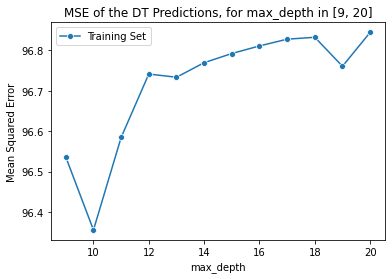

In [28]:
#graph the results of the above tests
fig = plt.figure()
ax = fig.add_subplot(111)
plot = sns.lineplot(x = depths_2, y = mses_depth, marker = 'o', label = 'Training Set')
plt.title('MSE of the DT Predictions, for max_depth in [9, 20]')
ax.set_xlabel('max_depth')
ax.set_ylabel('Mean Squared Error')
plt.show()

In [29]:
#above results show that 10 produces lowest mse, but it is still lower than 16
#so now try more values for min_samples_leaf and graph the results
print('Starting')
leaves_2 = [10, 15, 20, 25, 30, 35, 40, 45, 50]
mses_leaf = []
for value in leaves_2:
    model_dt = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = value)
    model_dt.fit(X_train_dt, y_train_dt)
    predictions = model_dt.predict(X_test_dt)
    mse = np.sqrt(mean_squared_error(y_test_dt, predictions))
    mses_leaf.append(mse)
    print('max_depth:', value, 'mse:', mse)
print('Done')

Starting
max_depth: 10 mse: 97.54794672097161
max_depth: 15 mse: 97.1915680994041
max_depth: 20 mse: 95.90187950434186
max_depth: 25 mse: 96.27952400478924
max_depth: 30 mse: 97.41761151185868
max_depth: 35 mse: 97.79034564920909
max_depth: 40 mse: 97.97848503553627
max_depth: 45 mse: 98.27092154555451
max_depth: 50 mse: 98.5865261164851
Done


In [30]:
#determine the current lowest value for mse
print('MSE min for DTS:', min(mses_leaf))

MSE min for DTS: 95.90187950434186


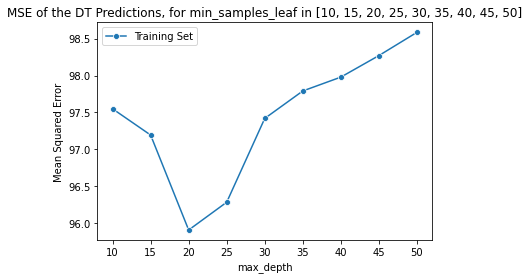

In [31]:
#graph the results
fig = plt.figure()
ax = fig.add_subplot(111)
plot = sns.lineplot(x = leaves_2, y = mses_leaf, marker = 'o', label = 'Training Set')
plt.title('MSE of the DT Predictions, for min_samples_leaf in [10, 15, 20, 25, 30, 35, 40, 45, 50]')
ax.set_xlabel('max_depth')
ax.set_ylabel('Mean Squared Error')
plt.show()

After all of the above testing, I have determined that the decision tree with the lowest mse has a max_depth of 10 and a min_samples_leaf of 20. Its MSE is 95.89511414280452. The MSE obtained from linear regression was 95.65215762780721. As these values differ by only 0.24, I will now perform feature selection on both of the models to determine which one results in the lowest MSE.

## Feature Selection on Linear Regression

In [51]:
#import tools needed for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [33]:
#create a function to test various feature values
def test_feature_number(feature_number):
    #initiate the selector and filter for feature selection
    selector = SelectKBest(f_classif, k = feature_number)
    selector.fit(X, y)
    filter = selector.get_support()
    top_x_features = X.columns[filter]
    #create new subsamples of data to train and test on
    new_x_train_lr = X_train_lr[top_x_features]
    new_x_test_lr = X_test_lr[top_x_features]
    #create new model
    model = LinearRegression()
    model.fit(new_x_train_lr, y_train_lr)
    predictions = model.predict(new_x_test_lr)
    #compute and return the mse
    mse = np.sqrt(mean_squared_error(y_test_lr, predictions))
    return mse

In [34]:
#initially test a wide range of features from 5 to 42 to identify a range to further test
feature_range = [5, 15, 25, 35, 42]
mses = []
for value in feature_range:
    mse = test_feature_number(value)
    mses.append(mse)
    print('number of features:', value, 'MSE:', mse)

number of features: 5 MSE: 109.32514574548559
number of features: 15 MSE: 101.04687880673305
number of features: 25 MSE: 99.25471444043133
number of features: 35 MSE: 95.79266101979105
number of features: 42 MSE: 95.65215762780721


In [35]:
#test values in-between 35 and 42 to see if improvement occurs- testing on whole oringinal
new_feature_range = [35, 36, 37, 38, 39, 40, 41, 42]
for value in new_feature_range:
    print('number of features:', value, 'MSE:', test_feature_number(value))

number of features: 35 MSE: 95.79266101979105
number of features: 36 MSE: 95.78922637746648
number of features: 37 MSE: 95.80374371826804
number of features: 38 MSE: 95.67233591622664
number of features: 39 MSE: 95.66013103856292
number of features: 40 MSE: 95.6511688195662
number of features: 41 MSE: 95.65215762780721
number of features: 42 MSE: 95.65215762780721


Doing this, I am observing that adding more features steadily decreases the mse, except for from 40 to 41 features. During my initial data preparation, I dropped the features that had a less than 2% correlation. I will now perform feature selection with those features included.


## Updating Data Frame to Include All Initial Features

In [36]:
#create new x and ys and new training and test sets from df_new with full amount of features
print('df_new dimensions:', df_new.shape)
#drop the columns that have no variance, determined in a much earlier cell to be NaN
#host_has_profile_pic                                 NaN
#host_identity_verified                               NaN
#room_type__Hotel room    NaN
to_drop = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'room_type__Hotel room']
df_new = df_new.drop(labels = to_drop, axis = 1)
y_whole = df_new['price']
X_whole = df_new.drop(labels = 'price', axis = 1)

X_train_whole_lr, X_test_whole_lr, y_train_whole_lr, y_test_whole_lr = train_test_split(X_whole, y_whole, test_size = 0.10, random_state = 42)
print('updated dimensions:', df_new.shape)

df_new dimensions: (28022, 54)
updated dimensions: (28022, 50)


In [37]:
#edit test_feature_number function so that it uses this new data set
def test_feature_number_whole(feature_number):
    #initiate the selector and filter for feature selection
    selector = SelectKBest(f_classif, k = feature_number)
    selector.fit(X_whole, y_whole)
    filter = selector.get_support()
    top_x_features = X_whole.columns[filter]
    #create new subsamples of data to train and test on
    new_x_train = X_train_whole_lr[top_x_features]
    new_x_test = X_test_whole_lr[top_x_features]
    #create new model
    model = LinearRegression()
    model.fit(new_x_train, y_train_whole_lr)
    predictions = model.predict(new_x_test)
    #compute and return the mse
    mse = np.sqrt(mean_squared_error(y_test_whole_lr, predictions))
    return mse
print('X whole shape:', X_whole.shape)

X whole shape: (28022, 49)


In [38]:
#test a range of feature values from 42 to 48
feature_range_whole = [42, 43, 44, 45, 46, 47, 48]
for value in feature_range_whole:
    print('number of features:', value, 'MSE:', test_feature_number_whole(value))

number of features: 42 MSE: 97.1145699022776
number of features: 43 MSE: 97.03383132431304
number of features: 44 MSE: 97.04023873932043
number of features: 45 MSE: 97.01460025193553
number of features: 46 MSE: 96.9857556110333
number of features: 47 MSE: 96.9727070571334
number of features: 48 MSE: 96.98104578012526


After adding these features back in, I have determined that the added features do not improve model performance, as they actually raise the mean squared error. To prove, the lowest mse obtaind without these features was 95.65116881956621, and the lowest obtaiend with it was 96.98104578012526.

## Feature Selection on Decision Trees

In [39]:
#now try feature selection on decision trees- create a function to do so that creates a decision tree model
def test_feature_number_dt(feature_number):
    #initiate the selector and filter for feature selection
    selector = SelectKBest(f_classif, k = feature_number)
    selector.fit(X, y)
    filter = selector.get_support()
    top_x_features = X.columns[filter]
    #create new subsamples of data to train and test on
    new_x_train_dt = X_train_dt[top_x_features]
    new_x_test_dt = X_test_dt[top_x_features]
    #create new model
    model = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 20)
    model.fit(new_x_train_dt, y_train_dt)
    predictions = model.predict(new_x_test_dt)
    #compute and return the mse
    mse = np.sqrt(mean_squared_error(y_test_dt, predictions))
    return mse

In [40]:
#test a range of feature values for decision trees
feature_range = [5, 15, 25, 35, 42]
mses_dt = []
for value in feature_range:
    mse = test_feature_number_dt(value)
    mses_dt.append(mse)
    print('number of features:', value, 'MSE:', mse)

number of features: 5 MSE: 110.32572581896717
number of features: 15 MSE: 97.63920318354113
number of features: 25 MSE: 96.9624627621338
number of features: 35 MSE: 95.70910158447678
number of features: 42 MSE: 95.88675247893707


In [41]:
#the range in between 25 and 35  features seems like it gets lower, test this
new_feature_range = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
for value in new_feature_range:
    print('number of features:', value, 'MSE:', test_feature_number_dt(value))

number of features: 25 MSE: 96.95841716228895
number of features: 26 MSE: 96.32621275967041
number of features: 27 MSE: 96.14924891333088
number of features: 28 MSE: 95.9617721469632
number of features: 29 MSE: 95.80252636442545
number of features: 30 MSE: 95.64093603180577
number of features: 31 MSE: 95.74922793425638
number of features: 32 MSE: 96.0071543302129
number of features: 33 MSE: 95.69657782427205
number of features: 34 MSE: 95.70317184322687
number of features: 35 MSE: 95.71891355287607


In [42]:
#now test 35 to 42 because it seems promising
new_feature_range_2 = [35, 36, 37, 38, 39, 40, 41, 42]
for value in new_feature_range_2:
    print('number of features:', value, 'MSE:', test_feature_number_dt(value))

number of features: 35 MSE: 95.71682860681408
number of features: 36 MSE: 95.62411662334969
number of features: 37 MSE: 95.81592619248502
number of features: 38 MSE: 95.9005022212203
number of features: 39 MSE: 95.81013350860847
number of features: 40 MSE: 95.81763906305683
number of features: 41 MSE: 95.89425203648965
number of features: 42 MSE: 95.81763906305683


So far, linear regression is performing better than decision trees. Also, adding in the initially dropped features to the linear regression model did not improve performance. However, just to be sure, I will now perform feature selection on decision trees using all of the initial features.

In [43]:
#t create new training and test splits for decision trees
X_train_whole_dt, X_test_whole_dt, y_train_whole_dt, y_test_whole_dt = train_test_split(X_whole, y_whole, test_size = 0.30, random_state = 123)

In [44]:
#create a function to run on the whole initial data set
def test_feature_number_dt_whole(feature_number):
    #initiate the selector and filter for feature selection
    selector = SelectKBest(f_classif, k = feature_number)
    selector.fit(X_whole, y_whole)
    filter = selector.get_support()
    top_x_features = X_whole.columns[filter]
    #create new subsamples of data to train and test on
    new_x_train_dt = X_train_whole_dt[top_x_features]
    new_x_test_dt = X_test_whole_dt[top_x_features]
    #create new model
    model = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 20)
    model.fit(new_x_train_dt, y_train_whole_dt)
    predictions = model.predict(new_x_test_dt)
    #compute and return the mse
    mse = np.sqrt(mean_squared_error(y_test_whole_dt, predictions))
    return mse

In [45]:
#test a range of values from 42 to 49
new_feature_range_3 = [35, 36, 37, 38, 39, 40, 41, 42]
for value in new_feature_range_3:
    print('number of features:', value, 'MSE:', test_feature_number_dt_whole(value))

number of features: 35 MSE: 95.43741407303737
number of features: 36 MSE: 95.57866847450764
number of features: 37 MSE: 95.89498929718714
number of features: 38 MSE: 95.9052370534698
number of features: 39 MSE: 96.08251100671735
number of features: 40 MSE: 96.15954373305857
number of features: 41 MSE: 96.16732484420932
number of features: 42 MSE: 96.2514346856932


## Analysis of Feature Selection

Performing feature selection on linear regression, the lowest MSE I obtained was 95.65116881956621, using 40 features. Performing feature selection on decision trees, the lowest MSE I obtaind was 95.6259986261303, using 35 features. 

However, with adding all of the initially dropped features back in, I obtained a MSE for decision trees of 95.4379410861848 using 35 features. The MSE then steadily increased for each new feature added. Interestingly though, without adding the initially dropped features and creating a model using 35 features, the resulting MSE was 95.6259986261303. This difference is very minimal, and it is likely due to small differences in the splits the decision tree model decided to make, but it is significant, because this is the lowest MSE obtained so far.
It is interesting to note that linear regression performed better using 5 more features than decision trees. 
Because the values are still so close, and decision trees are performing very slightly better, I will now finally try random forest to see if it produces better results. 

## Random Forest

In [46]:
#create training and test split data for random forest, use the whole initial data set to avoid having to add it in later
#may also need to perform feature selection on random forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_whole, y_whole, test_size=0.33, random_state=1234)


In [48]:
#train an initial random forest classifier using the base values for min_samples_leaf and max_depth
#use an initial number of estimators of 20
print('Start...')
rf_model_base = RandomForestRegressor(n_estimators = 20)
rf_model_base.fit(X_train_rf, y_train_rf)
predictions = rf_model_base.predict(X_test_rf)
mse = np.sqrt(mean_squared_error(y_test_rf, predictions))
print('MSE:', mse)



Start...
MSE: 87.42188744142936


In [49]:
#obtain the depths of the tree to determine the range
min_depth = min([tree.get_depth() for tree in rf_model_base])
max_depth = max([tree.get_depth() for tree in rf_model_base])
print('min:', min_depth, 'max:', max_depth)

min: 36 max: 49


Analysis: The first random forest model I have tried has lowered the MSE by about 8 units. As this is very promising, I will now experiment with different parameters for min_samples_leaf and max_depth, as well as different numbers of estimators.

In [53]:
#train another random forest classifier using max_depth of 10 and min_samples_leaf of 20 like previously determined
print('Start...')
rf_model = RandomForestRegressor(n_estimators = 20, max_depth = 10, min_samples_leaf = 20)
rf_model.fit(X_train_rf, y_train_rf)
predictions_new = rf_model.predict(X_test_rf)
mse_new = np.sqrt(mean_squared_error(y_test_rf, predictions_new))
print('MSE:', mse_new)

Start...
MSE: 89.79228458330714


In [54]:
#perform a grid search on various hyperparameter values, like I did previously for traditional decision trees
#because max_depth of 10 and min_samples_leaf of 20 increased MSE, try higher values to increase model complexity
#create parameter grid for grid_search
estimators = [33, 66, 100]
depths = [16, 32, 64]
leaves = [25, 50, 100]
param_grid = {'n_estimators': estimators, 'max_depth': depths, 'min_samples_leaf': leaves}
param_grid

{'max_depth': [16, 32, 64],
 'min_samples_leaf': [25, 50, 100],
 'n_estimators': [33, 66, 100]}

In [55]:
#perform grid search using parameter grid
print('Running grid search...')
model_rf = RandomForestRegressor()

#create a grid search object using 5 fold cross validation
grid = GridSearchCV(model_rf, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search = grid.fit(X_train_rf, y_train_rf)
print('Done')

Running grid search...
Done


In [57]:
#obtain best hyperparameters
print('Optimal hyperparameters:', grid_search.best_params_)

# calculate the MSE from the best hyperparameter configuration using aboslute value and squareroot so it is on the same scale as linear regression
print('MSE:', np.sqrt(abs(grid_search.best_score_)))

Optimal hyperparameters: {'max_depth': 16, 'min_samples_leaf': 25, 'n_estimators': 66}
MSE: 91.49795587709248


In [59]:
#because this MSE is still higher than the initial configuration I tested, try a range of values for n_estimators from 10-60
estimators = [10, 20, 30, 40, 50, 60]
mses = []
for value in estimators:
    rf_model_test = RandomForestRegressor(n_estimators = value)
    rf_model_test.fit(X_train_rf, y_train_rf)
    predictions_test = rf_model_test.predict(X_test_rf)
    mse_test = np.sqrt(mean_squared_error(y_test_rf, predictions_test))
    mses.append(mse_test)
    print('number of estimators:', value, 'MSE:', mse_test)
    

number of estimators: 10 MSE: 89.2347341660599
number of estimators: 20 MSE: 86.10158943408162
number of estimators: 30 MSE: 86.09630473692151
number of estimators: 40 MSE: 85.19354918018412
number of estimators: 50 MSE: 84.77320811401007
number of estimators: 60 MSE: 84.77065620389162


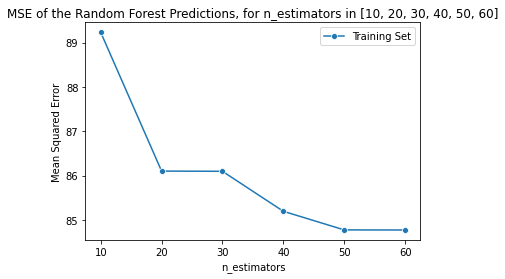

In [60]:
#create a graph of estimators vs. mse
fig = plt.figure()
ax = fig.add_subplot(111)
plot = sns.lineplot(x = estimators, y = mses, marker = 'o', label = 'Training Set')
plt.title('MSE of the Random Forest Predictions, for n_estimators in [10, 20, 30, 40, 50, 60]')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Squared Error')
plt.show()

In [62]:
#because it appears that a dip is occurring in the MSE from 40 - 60, test more values in that range
estimators_2 = [40, 45, 50, 55, 60]
mses_2 = []
for value in estimators_2:
    rf_model_test = RandomForestRegressor(n_estimators = value)
    rf_model_test.fit(X_train_rf, y_train_rf)
    predictions_test = rf_model_test.predict(X_test_rf)
    mse_test = np.sqrt(mean_squared_error(y_test_rf, predictions_test))
    mses_2.append(mse_test)
    print('number of estimators:', value, 'MSE:', mse_test)

number of estimators: 40 MSE: 85.75849391269227
number of estimators: 45 MSE: 85.87265167096615
number of estimators: 50 MSE: 84.71755608705949
number of estimators: 55 MSE: 84.92729981215365
number of estimators: 60 MSE: 84.78734092929388


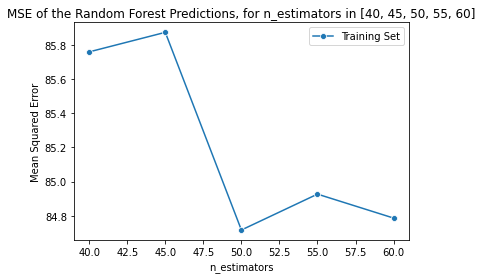

In [63]:
#create a graph to visualize
fig = plt.figure()
ax = fig.add_subplot(111)
plot = sns.lineplot(x = estimators_2, y = mses_2, marker = 'o', label = 'Training Set')
plt.title('MSE of the Random Forest Predictions, for n_estimators in [40, 45, 50, 55, 60]')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Squared Error')
plt.show()

In [65]:
#now test more values in the range of 50 - 60 to see if any more improvement can be made
#also identify what the min and max depths of the trees are to identify a range for further testing
estimators_3 = [50, 52, 54, 56, 58, 60]
mses_3 = []
for value in estimators_3:
    rf_model_test = RandomForestRegressor(n_estimators = value)
    rf_model_test.fit(X_train_rf, y_train_rf)
    predictions_test = rf_model_test.predict(X_test_rf)
    mse_test = np.sqrt(mean_squared_error(y_test_rf, predictions_test))
    mses_3.append(mse_test)
    print('number of estimators:', value, 'MSE:', mse_test)
    min_depth = min([tree.get_depth() for tree in rf_model_test])
    max_depth = max([tree.get_depth() for tree in rf_model_test])
    print('min:', min_depth, 'max:', max_depth)

number of estimators: 50 MSE: 84.89479942198511
min: 35 max: 50
number of estimators: 52 MSE: 84.77099081313197
min: 35 max: 50
number of estimators: 54 MSE: 85.52271549637727
min: 35 max: 46
number of estimators: 56 MSE: 85.10631099078998
min: 35 max: 47
number of estimators: 58 MSE: 84.90081570142475
min: 35 max: 50
number of estimators: 60 MSE: 85.18645610373943
min: 35 max: 44


In [66]:
#the current lowest value is obtained with 50 estimators, with an MSE of about 84.72.
#this value is obtained with no max_depth and a min_samples_leaf of 1, allowing maximum amount of model complexity

#try a value of depths with max going from 45 to 50 to determine the best one 
depths = [45, 47, 49]
#use values close to 1
leaves = [2, 4, 6]
param_grid = {'max_depth': depths, 'min_samples_leaf': leaves}
param_grid


{'max_depth': [45, 47, 49], 'min_samples_leaf': [2, 4, 6]}

In [69]:
#perform a grid search, holding n_estimators at 50
print('Running grid search...')
model_final = RandomForestRegressor(n_estimators = 50)

#create a grid search object using 5 fold cross validation
grid = GridSearchCV(model_final, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search = grid.fit(X_train_rf, y_train_rf)
print('Done')

Running grid search...
Done


In [70]:
#obtain best hyperparameters
print('Optimal hyperparameters:', grid_search.best_params_)

# calculate the MSE from the best hyperparameter configuration using aboslute value and squareroot so it is on the same scale as linear regression
print('MSE:', np.sqrt(abs(grid_search.best_score_)))

Optimal hyperparameters: {'max_depth': 49, 'min_samples_leaf': 2}
MSE: 86.88072759551875


In [71]:
#create the final model to be downloaded into a pickle file
print('Start...')
rf_optimal = RandomForestRegressor(n_estimators = 50)
rf_optimal.fit(X_train_rf, y_train_rf)
predictions= rf_optimal.predict(X_test_rf)
mse_new = np.sqrt(mean_squared_error(y_test_rf, predictions))
print('MSE:', mse_new)

Start...
MSE: 85.08631018224473


## Final Analysis

When I initially started this problem of predicting the price of an airbnb, I decided to use only numerical features and try simple models, like linear regression and decision trees. At first, I removed all non-numerical or boolean features from the data set. This included removing features like 'neighbourhood_group_cleansed' and 'room_type'. However, my initial linear regression model had an MSE of 222, which is very high. My decision tree performed much better, with an MSE of around 97. Before I started the feature selection process on the better of the two models, I decided to see if any of the object features had high predictive value. This led me to discover that 'neighbourhood_group_cleansed' and 'room_type' only had five or four values, so they could be one-hot encoded very easily. I then tested their correlations with the price label and discovered that they had correlations of as high as 0.36. I then re-trained my linear model on this new data and achieved an MSE of about 95, with the decision tree performing very similarly.

I then dedicated significant analysis and time to attempting to optimize both the linear regression and decision tree models, as their performances were so similar. I performed detailed hyperparameter optimization on the decision tree, performing a grid search on various values of max_depth and min_samples_leaf. Additionally, I performed feature selection on both the linear regression and decision tree models. However, despite all of the investigation I did, I was only able to achieve an MSE of 95.437. Because the range of the price column is from 30 to 890, this MSE is not very good. 
It was also very intersting to me how linear regression and decision trees could be performing so similarly. I theororize this is because the data is somewhat linear in nature, which takes intuitive sense, as something like increasing the number of beds in an airbnb would logically increase its price. 
Because my two models were performing so similarly and I was struggling to make further improvements to the MSE, I decided to try a Random Forest Regressor model, as decision trees were promising, and I thought that perhaps the trees in the random forest model could cancel out their respective errors. Training an initial random forest model, I achieved an MSE of 87, down 8 units from my previous best. I then decided to extensively test hyperparameter values for n_estimators, min_samples_leaf, and max_depth. The results of this testing were that each combination of hyperparameters produced a higher MSE than the initial configuration did. Therefore, I determined that my hyperparameter values were capping how complex the tree could grow, which was harming performance. 

Because the initial configuration used 20 estimators, I then decided to test a range of estimators from 10 - 60, while keeping the default values for max_depth and min_samples_leaf. I repeatedly tested subsets of this range, and I determined that the lowest MSE was produced with 56 estimators. Finally, I decided to try one more grid search to identify the optimal hyperparameters. I calculated what the max depth of each tree from the initial configuration was to identify a good range to test. 
From this grid search, I deduced a max_depth of 49 and a min_samples_leafof 2 were the optimal values, but they still produced a higher MSE than the base values. As these values were the least-restrictive of all the ones I tested in my grid search, I am further supported in deducing that any attempt to alter these parameters decreases the complexity of the madel, making it more prone to bias.

Overall, my  best model was a random forest regressor with 50 estimators, no max_depth, and a min samples leaf of 1. This had an MSE of around 84.72, but my final model with the same hyperparameters produced a MSE of 85.01, likely due to small differences in the split values of the decision trees.
As this MSE is still quite high relative to the price range of 30 - 890 dollars for an airbnb, it is not likely that this current model could be used for a commercial application. However, from the initial model I tested to my final model, I was able to bring the MSE down by around 11 units through extensive analysis and thorough testing of different model and hyperparameter configurations.
I theorize that my model is not performing as well as I would like because there may not be enough features with a high enough correlation with the label. Additonally, the data may be noisy, which is causing the models to be prone to overfitting. It is also possible that the three models I tried are not ideal for this problem, and that perhaps something like a neural network would be able to better learn the relationships between the features and the data.

From this experiment, I learned to never immediately dismiss object features, as they may have very high predictive value. Additonally, I learned to perform empirical feature selection rather than immediately remove features with a less than x% correlation with the label. Finally, I learned that changing the model can drastically change predictive performance, as a switch to random forest initially improved my performance by 8 units.
Through performing this experiment, I now feel much more confident in my ability to pre-process data, perform feature selection and engineering, and test different model configurations.
To continue improving this model, my next steps would be to try more models, such as gradient-boosted decision trees and neural networks. 
